In [1]:
import cooler
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from hict.api.ContactMatrixFacet import ContactMatrixFacet
from pathlib import Path

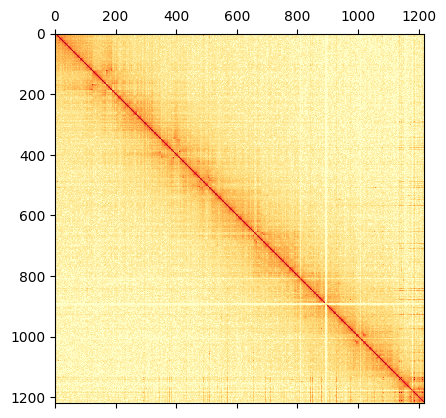

In [2]:
c = cooler.Cooler('data/mopti_female_4DN.mcool::/resolutions/1000')
mat_balnced = c.matrix(balance=False).fetch('tig00000413_1')
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(mat_balnced+1), cmap='YlOrRd')
fig.colorbar(im)
#mat = c.matrix(balance=True).fetch('tig00000006_1')
#plt.matshow(np.log10(mat,  where=(mat!=0)), cmap='YlOrRd')

In [5]:
chunkFile = ContactMatrixFacet.get_file_descriptor('data/mopti_female_4DN.mcool.hict.hdf5')
ContactMatrixFacet.open_file(chunkFile)
ContactMatrixFacet.load_assembly_from_agp(chunkFile, Path('data/mopti_female_assembly.agp'))
_, contig_location, contig_location_exclude_hidden, _  = chunkFile.get_contig_location(chunkFile.contig_name_to_contig_id['tig00000413_1'])
res = 100000
matrix, w_r, w_c = ContactMatrixFacet.get_dense_submatrix(chunkFile,
                                                          res, contig_location[res][0],contig_location[res][0], contig_location[res][1], contig_location[res][1], exclude_hidden_contigs=False,fetch_cooler_weights=True)
#matrix = ContactMatrixFacet.apply_cooler_balance_to_dense_matrix(matrix, w_r, w_c,False)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1, where=(matrix!=0)), cmap='Greens')
fig.colorbar(im)

Error in callback <function _draw_all_if_interactive at 0x7f9a7925c550> (for post_execute):


FloatingPointError: underflow encountered in true_divide

FloatingPointError: underflow encountered in true_divide

<Figure size 640x480 with 2 Axes>

In [12]:
np.allclose(matrix, mat_balnced)

False

In [15]:
print(sum(w_r))
print(sum(w_c))

21015
696.2866370635966


In [10]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(name_list, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'Custom colormaps', fontsize=14)

    for ax, colmap, name in zip(axs, cmap_list, name_list):
        ax.imshow(gradient, aspect='auto', cmap=colmap)
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

In [7]:
cmapYlBLue = clr.LinearSegmentedColormap.from_list('custom blue', ['#f9fd00','#0400fd'], N=256)
cmapRedContrast = clr.LinearSegmentedColormap.from_list('Red contrast', ['#00fdfd','#fd0000'], N=256)
cmapAcid = clr.LinearSegmentedColormap.from_list('Acid', ['#00fd34','#fd00c9'], N=256)
cmapWhiteToRed = clr.LinearSegmentedColormap.from_list('White to red',
                                                       [(0, '#000000'),
                                                        (0.5, '#ff0004'),
                                                        (1, '#ff8082')], N=256)
cmaps_list = [plt.get_cmap('Greens'), cmapYlBLue, cmapRedContrast, cmapAcid, cmapWhiteToRed]
plot_color_gradients(['Greens','Yellow blue', 'Red contrast', 'Acid', 'White to red'], cmaps_list)



NameError: name 'plot_color_gradients' is not defined

In [6]:
for clr_map in cmaps_list:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.matshow(np.log10(matrix+1, where=(matrix!=0)), cmap=clr_map)
    fig.colorbar(im)

NameError: name 'cmaps_list' is not defined